## New York AirBnB Listing Analysis

In this project, we will do some Exploratory Data Analysis on New York AirBNB Listings. For this project, the real world dataset has been downloaded from <a href="http://insideairbnb.com/get-the-data/">Inside Airbnb Dataset</a>.

The data contains information about listing id, host id, neighborgood, room_type, price etc.




In [1]:
# Preparing the tools.
# Regular EDA (Exploratory Data Analysis) and plotting libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# We want our plot to appear in the notebook
%matplotlib inline

/Users/i832861/env/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
# Load the data from CSV file.
ny_listing = pd.read_csv("../../datascience-projects/data/NY-airbnb-listings.csv")
ny_listing.head()

id                                name  host_id            host_name  \
0  77765                Superior @ Box House   417504  The Box House Hotel   
1   2539  Clean & quiet apt home by the park     2787                 John   
2  45910  Beautiful Queens Brownstone! - 5BR   204539                 Mark   
3  45935        Room in Beautiful Townhouse.   204586                    L   
4  45936  Couldn't Be Closer To Columbia Uni   867225                Rahul   

  neighbourhood_group        neighbourhood  latitude  longitude  \
0            Brooklyn           Greenpoint  40.73777  -73.95366   
1            Brooklyn           Kensington  40.64529  -73.97238   
2              Queens            Ridgewood  40.70309  -73.89963   
3               Bronx           Mott Haven  40.80635  -73.92201   
4           Manhattan  Morningside Heights  40.80630  -73.95985   

         room_type  price  minimum_nights  number_of_reviews last_review  \
0       Hotel room    308               2                 42  2022-07-18   
1     Private room    299              30                  9  2018-10-19   
2  Entire home/apt    425              30                 13  2019-11-12   
3     Private room     60              30                  0         NaN   
4     Private room     75              31                135  2022-07-11   

   reviews_per_month  calculated_host_listings_count  availability_365  \
0               0.30                              30               217   
1               0.11                               9               356   
2               0.10                               6               365   
3                NaN                               1                83   
4               0.95                               1               219   

   number_of_reviews_ltm license  
0                      4     NaN  
1                      0     NaN  
2                      0     NaN  
3                      0     NaN  
4                      4     NaN

In [3]:
# check how many records are in the dataset 
# and if we have any NA
ny_listing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39881 entries, 0 to 39880
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              39881 non-null  int64  
 1   name                            39868 non-null  object 
 2   host_id                         39881 non-null  int64  
 3   host_name                       39831 non-null  object 
 4   neighbourhood_group             39881 non-null  object 
 5   neighbourhood                   39881 non-null  object 
 6   latitude                        39881 non-null  float64
 7   longitude                       39881 non-null  float64
 8   room_type                       39881 non-null  object 
 9   price                           39881 non-null  int64  
 10  minimum_nights                  39881 non-null  int64  
 11  number_of_reviews               39881 non-null  int64  
 12  last_review                     

As we can see above, our data contains 39,868 records, 17 columns, and no null values.

Generate descriptive statistics.

Descriptive statistics include those that summarize the central
tendency, dispersion and shape of a
dataset's distribution, excluding ``NaN`` values.

In [4]:
# Let's use describe function to see some statistics related to price column
ny_listing["price"].describe()

count    39881.000000
mean       197.547228
std        353.332542
min          0.000000
25%         80.000000
50%        130.000000
75%        219.000000
max      16500.000000
Name: price, dtype: float64

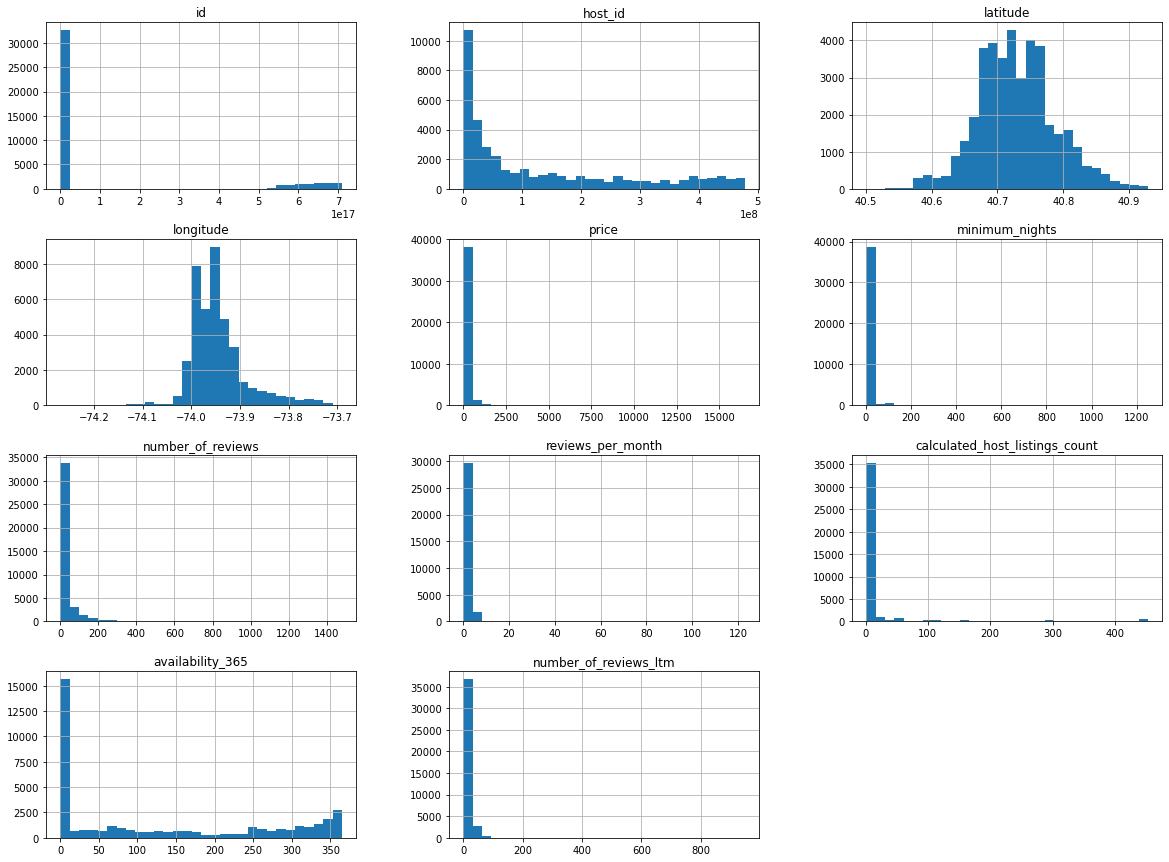

In [5]:
# checking the graphical rep of the whole dataset(only numerical attributes)
ny_listing.hist(bins=30,figsize=(20,15))
plt.show()

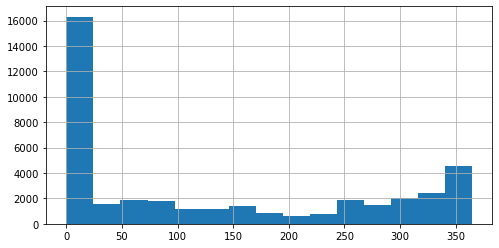

In [6]:
ny_listing["availability_365"].hist(bins=15, figsize=(8,4))
plt.show();

From the histogram, we can see average room availability is between 50-300 days in a year. 

In [7]:
ny_listing["room_type"].value_counts()

Entire home/apt    22761
Private room       16361
Shared room          557
Hotel room           202
Name: room_type, dtype: int64

By using `value_counts()` function for `ny_listing["room_type]` we see that

1. No. of Entire home/apt **22761**
2. No. of Private room  **16361**
3. No. of Shared room   **557**
4. No. of Hotel room    **202**


In [8]:
ny_listing["neighbourhood_group"].value_counts()

Manhattan        16847
Brooklyn         14845
Queens            6175
Bronx             1568
Staten Island      446
Name: neighbourhood_group, dtype: int64

The dataset contains 5 neighbourhood groups **Manhattan, Brooklyn, Queens, Bronx, Staten Island**

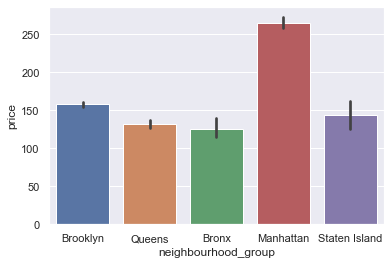

In [9]:
# Let's create first seaborn barplot
sns.set_theme(style='darkgrid')
sns.barplot(x=ny_listing["neighbourhood_group"], y=ny_listing["price"])
plt.show()

In [10]:
# Let's use groupby pandas function to find some more statistics
ny_listing.groupby("room_type")["price"].mean()

room_type
Entire home/apt    251.546022
Hotel room         371.648515
Private room       122.936495
Shared room        119.398564
Name: price, dtype: float64

Based of the groupby function, we can see that `Hotel Room` are more expensive. 

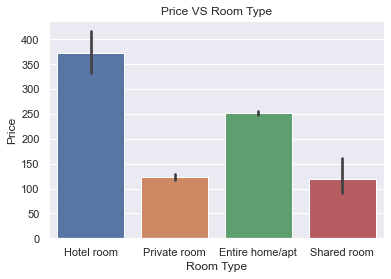

In [11]:
# We can see above information visually below.
sns.barplot(x=ny_listing["room_type"], y=ny_listing["price"], data=ny_listing)

# Add title, x axis label and y axis label for more readability.
plt.title("Price VS Room Type")
plt.xlabel("Room Type")
plt.ylabel("Price")
plt.show()

In [12]:
#Lets check min and max rooom price
ny_listing.groupby("room_type")["price"].agg(['min', 'max'])

min    max
room_type                  
Entire home/apt   10  15000
Hotel room         0   1998
Private room      10  16500
Shared room       10  10000

In [13]:
# Lets check mean of price in each neighbourhood group in NY city
ny_listing.groupby("neighbourhood_group")["price"].mean()

neighbourhood_group
Bronx            124.737245
Brooklyn         157.927114
Manhattan        264.933341
Queens           131.365506
Staten Island    143.163677
Name: price, dtype: float64

In [14]:
# Lets check mean of price in each neighbourhood in NY city
ny_listing.groupby("neighbourhood")["price"].mean()

neighbourhood
Allerton           118.777778
Arden Heights      113.857143
Arrochar           132.058824
Arverne            230.263636
Astoria            109.008746
                      ...    
Windsor Terrace    175.403509
Woodhaven           94.529412
Woodlawn           141.000000
Woodrow            115.000000
Woodside            84.723214
Name: price, Length: 244, dtype: float64

In [15]:
# Lets check min and max in neighbourhood
ny_listing.groupby("neighbourhood")["price"].agg(['min', 'max'])

min   max
neighbourhood             
Allerton          34   330
Arden Heights     40   158
Arrochar          75   350
Arverne           39  1365
Astoria           22  1300
...              ...   ...
Windsor Terrace   24   995
Woodhaven         36   363
Woodlawn          43   350
Woodrow          115   115
Woodside          10  1036

[244 rows x 2 columns]

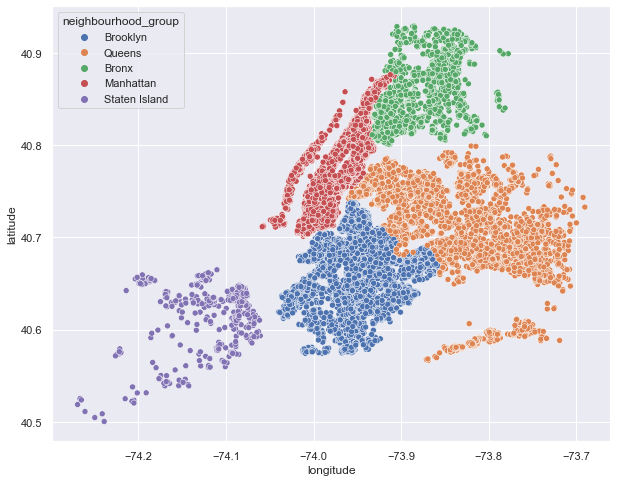

In [16]:
# Map of neighbourhood group

plt.figure(figsize=(10,8))
sns.scatterplot(x=ny_listing["longitude"], y=ny_listing["latitude"], hue=ny_listing["neighbourhood_group"])
plt.show()

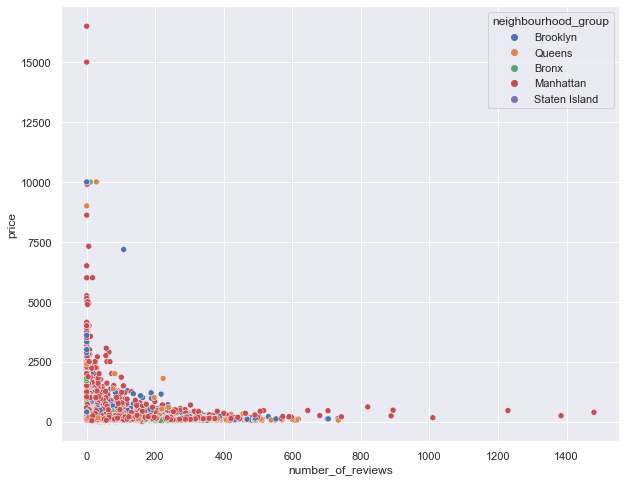

In [17]:
# Map of neighbourhood group

plt.figure(figsize=(10,8))
sns.scatterplot(x=ny_listing["number_of_reviews"], y=ny_listing["price"], 
            hue=ny_listing["neighbourhood_group"], data= ny_listing)
plt.show()

Per above scatterplot, we see that no co-relation exists between price and number of reviews.

Next steps:

> 1. Apply regression alogorithm to predict the price of airbnb house based of other given features.
> 2. Evalution of model. 